## Recap: Load the data

In [1]:
import pandas as pd
surveys_df = pd.read_csv('../course_materials/data/surveys.csv')
surveys_df.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.477847,15.991195,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396925,8.257366,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,10.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


In addition to learning about characteristics of our dataset as a whole, we may be interested in analyzing parts (subsets) of our data.
For exampe we want to know how heavy our samples are:

In [2]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

We can also extract one specific metric if we wish:

In [3]:
surveys_df['weight'].min()
surveys_df['weight'].max()
surveys_df['weight'].mean()
surveys_df['weight'].std()
surveys_df['weight'].count()

32283

## Selecting data using column names

In the [morning session](Introduction_to_python_3.ipynb) we saw how to get specific values from dictionaries using keys. We can do the same with DataFrames, in fact we have already accessed the values in a column by the column name. In this section we will discover how to select values, slices of data and subsets of a DataFrame.
There are two ways of selecting columns, we have already used the first:

In [4]:
surveys_df['species_id']

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

In [5]:
surveys_df.species_id

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

How can we now create a DataFrame that only consists of the two columns *plot_id* and *species_id*?

In [6]:
surveys_df[['plot_id', 'species_id']]

,plot_id,species_id
0,2,NL
1,3,NL
2,2,DM
3,7,DM
4,3,DM
...,...,...
35544,15,AH
35545,15,AH
35546,10,RM
35547,7,DO


Why the double *[[..]]*? What is the difference between `surveys_df['plot_id']` and `surveys_df[['plot_id']]`? Let us have a closer look:

In [7]:
print(type(surveys_df['plot_id']))
print(type(surveys_df[['plot_id']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


The DataFrame is organised as a dictionary with the column names as keys and row numbers as keys for the values stored in a row. `surveys_df['plot_id']` will give us the value behind the key *plot_id*, in our case the series of numbers. When we ask for the values behind *plot_id* **and** *species_id* we need to give the DataFrame a *list* of column names like we did with `surveys_df[['plot_id', 'species_id']]`.
When we pass a list of column names to a DataFrame, Pandas will execute for us the following code so that we do not have to worry about that any longer:

In [8]:
col1 = surveys_df['plot_id']
col2 = surveys_df['species_id']
aggregatedData = pd.DataFrame(dict(col1 = col1, col2 = col2))
aggregatedData

,col1,col2
0,2,NL
1,3,NL
2,2,DM
3,7,DM
4,3,DM
...,...,...
35544,15,AH
35545,15,AH
35546,10,RM
35547,7,DO


## Slicing subsets of rows
Slicing using the `[]` operator selects a set of rows and/or columns from a DataFrame. To slice out a set of rows, you use the following syntax: `data[start:stop]`. When slicing in pandas the start bound is included in the output. The stop bound is not included. The slicing stops _before_ the stop bound.
So if you want to select rows 0, 1 and 2 your code would look like this:

In [9]:
surveys_df[0:3]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN


We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing. The respective functions for that are called `loc` (label-based indexing) and `iloc` (integer-based indexing).

Let's have a look at `iloc` first. where we use the index of a row and/or column to select it. In the example below we select the first three entries and the columns month, day and year (the second, third and fourth column, remember indexing starts at 0 on Python). The first range of numbers selects the rows, the second the columns:

In [10]:
# iloc[row slicing, column slicing]
surveys_df.iloc[0:3, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977


We can achieve the same with the function `loc`, only instead of column indices, we use the column labels this time. So, we need to know the names of the columns:

In [11]:
surveys_df.loc[0:3, ['month', 'day', 'year']]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977
3,7,16,1977


And there is a third way: In a first step we select the columns by their names `surveys_df[['month', 'day', 'year']]`. From the resulting DataFrame we then, in a second step, select the first three rows `[0:3]`. Putting the two steps together, the code looks like this:

In [12]:
surveys_df[['month', 'day', 'year']][0:3]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977


### Interactive Part
Let us further explore the `loc` and  `iloc` functions as they are more powerful. Have a look at the examples below and predict their outcome before hitting enter.

In [13]:
# Select all columns for rows of index values 0 and 10
surveys_df.loc[[0, 10], :]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN


In [14]:
# What does this do?
surveys_df.loc[0, ['species_id', 'plot_id', 'weight']]

species_id     NL
plot_id         2
weight        NaN
Name: 0, dtype: object

In [15]:
# What happens when you type the code below?
surveys_df.loc[[0, 10, 35549], :]

KeyError: '[35549] not in index'

We can also extract single values from our DataFrame:

In [16]:
# data.iloc[row, column]
surveys_df.iloc[2, 6]

'F'

### Summary: Selecting slices, rows and columns
In the first two methods we extract the column specifying its name. The third method is essentially identical to the first one as the 6th (index 5) element of the Series ```surveys_df.columns``` is *species_id*. The fourth method uses the method ```iloc``` to select *all* the rows of the 6th column. 

In [17]:
# By name
# --------------------------------------
# Method1
plot_id_1 = surveys_df['species_id']

# Method2
plot_id_2 = surveys_df.species_id
# --------------------------------------

# By location
# --------------------------------------
# Method3
plot_id_3 = surveys_df[surveys_df.columns[5]]

# Method4
plot_id_4 = surveys_df.iloc[:,5]
# --------------------------------------

<div class="alert alert-block alert-success">
<b>Exercise 3 to 5</b>
    
Now go to the Jupyter Dashboard in your internet browser and continue with the afternoon exercises 3 to 5.

### Subsetting Data according to user-defined criteria

We can extract subsets of our DataFrame following the general syntax ```data_frame[<condition_on_data>]``` <condition_on_data> is a conditional statement on the DataFrame content itself. You may think at the conditional statement as a question or query you ask to your DataFrame. Here there are some examples:

In [18]:
# What are the data collected in the year 2002?
surveys_df[surveys_df.year == 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [19]:
# What are the data NOT collected in the year 2002?
surveys_df[surveys_df.year != 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


In [20]:
# What are the data NOT collected in the year 2002? (different syntax)
surveys_df[~(surveys_df.year == 2002)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


Our filtering conditions may be very specific, they can target different columns in the DataFrame, and they can be combined using the logical operator "&" which means **and**:

In [21]:
# What are the data collected between 2000 and 2002 on female species?
surveys_df[(surveys_df.year >= 2000) & (surveys_df.year <= 2002) & (surveys_df.sex == 'F')]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
30158,30159,1,8,2000,1,PP,F,22.0,17.0
30160,30161,1,8,2000,1,PP,F,21.0,17.0
30164,30165,1,8,2000,1,PP,F,22.0,15.0
30168,30169,1,8,2000,2,PB,F,25.0,24.0
30171,30172,1,8,2000,2,NL,F,30.0,137.0
...,...,...,...,...,...,...,...,...,...
35539,35540,12,31,2002,15,PB,F,26.0,23.0
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0


Below we filter for rows with collected data on female species in the year 2000 or 2002.
"Give me all data where sex is Female and data is collected in 2000 or 2002".

The method ```isin()``` allows to specify a range of "permitted" values for a certain column. Here it follows another example:

In [22]:
surveys_df[(surveys_df.year == 2000) & (surveys_df.sex == 'F') & (surveys_df.month.isin([1,3,4]))]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
30158,30159,1,8,2000,1,PP,F,22.0,17.0
30160,30161,1,8,2000,1,PP,F,21.0,17.0
30164,30165,1,8,2000,1,PP,F,22.0,15.0
30168,30169,1,8,2000,2,PB,F,25.0,24.0
30171,30172,1,8,2000,2,NL,F,30.0,137.0
...,...,...,...,...,...,...,...,...,...
30637,30638,4,30,2000,20,PP,F,22.0,20.0
30640,30641,4,30,2000,20,NL,F,30.0,NaN
30645,30646,4,30,2000,24,PP,F,20.0,17.0
30647,30648,4,30,2000,17,DM,F,36.0,46.0


We have also an operator for **or**. For the sake of showing the syntax, below we fetch all entries from the year 2000 or from the gender female:

In [23]:
print(surveys_df[(surveys_df.year == 2000) | (surveys_df.sex == 'F')])

       record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
2              3      7   16  1977        2         DM   F             37.0   
6              7      7   16  1977        2         PE   F              NaN   
8              9      7   16  1977        1         DM   F             34.0   
9             10      7   16  1977        6         PF   F             20.0   
10            11      7   16  1977        5         DS   F             53.0   
...          ...    ...  ...   ...      ...        ...  ..              ...   
35539      35540     12   31  2002       15         PB   F             26.0   
35540      35541     12   31  2002       15         PB   F             24.0   
35541      35542     12   31  2002       15         PB   F             26.0   
35542      35543     12   31  2002       15         PB   F             27.0   
35546      35547     12   31  2002       10         RM   F             15.0   

       weight  
2         NaN  
6         NaN  
8  

## DataFrame Cleaning

A simple exploration of our DataFrame showed us that there are columns full of invalid values (NaN). One of the most important preliminary operations of data analysis is cleaning your data set, i.e. "getting rid" of non-numerical or non-character values. we want to make sure that our data only contains meaningful values. 

Now that we mastered selecting, slicing, and subsetting, we can easily clean our DataFrame with few lines of code. Let us have a look at the function *isnull*. It is a Pandas function which we imported at the beginning with `import pandas as pd`. Now we can call the functin like this:

In [24]:
pd.isnull(4)

False

In [25]:
pd.isnull([1, 2, 3, '', dict(), None])

array([False, False, False, False, False,  True])

We can pass single values or array-like values to the function. The function will then check for us whether each value is `NaN` (Not a Number) or `None` and return a boolean array.
Note, that values like the empty string (a strin without any characters in it) or an empty dictionary etc will not count as `null` value, they do have a type, they only do not contain any values but they are something. 
`null` values in python are only `NaN` and `None`. When you read in tabular data into a DataFrame empty cells will be shown as `NaN`. `None` stands for the type *NoneType*, which we will not dive into further in this workshop.

With all that kowledge we can now detect `null` values in the column *weight* and do something about it. Let us have a look how many `null` values we can find:

In [26]:
pd.isnull(surveys_df.weight) # boolean array indicating where null values are found

0         True
1         True
2         True
3         True
4         True
         ...  
35544     True
35545     True
35546    False
35547    False
35548     True
Name: weight, Length: 35549, dtype: bool

We can use the Series with the boolean values as a mask on the DataFrame. Here we only extract the rows of `surveys_df` where the weight is not defined:

In [27]:
surveys_df[pd.isnull(surveys_df.weight)] # all lines that have a null value in the column weight
len(surveys_df[pd.isnull(surveys_df.weight)]) # length

3266

As you can see, in our whole dataset 3266 weight values are not usable. We need to do something with those values.

Another thing that would not make sense are negative weights. Let's check whether the remaining 32283 values in the *weight* column are positive:

In [28]:
len(surveys_df[surveys_df.weight > 0])

32283

As we see, we have 32283 non-negative *weight* values. The remaining 3266 values in the *weight* column are not set, so they are `null`. How can we impute the values? Let us have a look at the average weight:

In [29]:
surveys_df.weight.mean()

42.672428212991356

A smooth run, without errors or warnings. As we said several times, Pandas is a library designed for data analysis and when performing data analysis it is very common to deal with not numeric values. In particular, the ```.mean()``` method has an argument called *skipna* that when set `True` (default value, so we do not need to specify it) excludes NaN values. This means that, in this case, Pandas simply ignores whatever it is not numeric and it performs computations only on numeric values.

If we are not happy with Pandas default behaviour, we can manually decide which value to assign to cells that contain `null` values. One possible choice is setting them to zero. To do that, we just need to apply the method ```.fillna(<value>)```, where `<value>` is the number we want to substitute to the `null` value with (in our case, 0).

In [30]:
cleaned_weight1 = surveys_df.weight.fillna(0)
cleaned_weight_ave1 = cleaned_weight1.mean()
print(cleaned_weight_ave1)

38.751976145601844


You see that when filling the `null` values with 0, the average weight decreases. This is because the mean is now computed on data with many more zeros compared to the previous one.
Conscious of this problem, we may now choose a more appropriate value to "fill" our `null` values. How about we use the "clean" mean of our first computation?

In [31]:
cleaned_weight2 = surveys_df.weight.fillna(surveys_df.weight.mean())
cleaned_weight_ave2 = cleaned_weight2.mean()
print(cleaned_weight_ave2)

42.672428212991356


This time we obtain exactly the same result of our first computation, this is because we substituted the `null` values with a mean computed excluding the `null` values.

<div class="alert alert-block alert-success">
<b>Exercise 6 and 7</b>

Now go to the Jupyter Dashboard in your internet browser and continue with the afternoon exercises 6 and 7.

## Grouping

We often want to calculate summary statistics grouped by subsets or attributes within fields of our data. For example, we might want to calculate the average weight of all individuals per site.

As we have seen above we can calculate basic statistics for all records in a single column using the syntax below:

In [32]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

If we want to summarize by one or more variables, for example sex, we can use Pandas’ `.groupby()` method. Once we’ve created a groupby DataFrame, we can quickly calculate summary statistics by a group of our choice.

In [33]:
grouped_data = surveys_df.groupby('sex')
grouped_data.describe()

record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.587253  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.396184  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.184981  4.0  20.0  39.0  49.0  280.0  

[2 rows x 56 columns]

The output is a bit overwhelming. Let's just have a look at one statistical value, the mean, to understand what is happening here:

In [34]:
grouped_data.mean()

C:\Users\Moope001\AppData\Local\Temp\ipykernel_25336\1133710423.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data.mean()


,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.587253,15.880943,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.396184,16.078799,1990.480401,11.098282,29.709578,42.995379


We see that the data is divided into two groups, one group where the value in the column *sex* equals "F" and another group where the value in the column *sex* equals "M". The statistics is then calculated for all samples in that specific group for each of the columns in the dataframe. Note that samples annotated with sex equals NaN and column values with NaN are left out.

## Structure of a groupby object
We can investigate which rows are assigned to which group as follows:

In [35]:
print(type(grouped_data.groups)) # dictionary
print("Plot ids: ", grouped_data.groups.keys()) # keys are the unique values of the column we grouped by
print("Rows belonging to sex 'F': ", grouped_data.groups['F']) # values are row indexes 

<class 'pandas.io.formats.printing.PrettyDict'>
Plot ids:  dict_keys(['F', 'M'])
Rows belonging to sex 'F':  Int64Index([    2,     6,     8,     9,    10,    14,    15,    16,    19,
               20,
            ...
            35531, 35532, 35535, 35536, 35537, 35539, 35540, 35541, 35542,
            35546],
           dtype='int64', length=15690)


## Grouping by multiple columns
Now let's have a look at a more complex grouping example. We want an overview statistics of the weight of all females and males by plot id. So in fact we want to group by *sex* and by *plot_id* at the same time.

This will give us exactly 48 groups for our survey data:

* female, plot id = 1
* female, plot id = 2
* ...
* female, plot id = 24
* male, plot id = 1
* ...
* male, plot id = 24

Why 48 groups? We have 24 unique values for *plot_id*. Per plot we have two groups of samples, female and male. Hence, the grouping returns 48 groups.

In [36]:
grouped_data = surveys_df.groupby(['sex', 'plot_id'])
grouped_data["weight"].describe()

count       mean        std  min    25%   50%    75%    max
sex plot_id                                                              
F   1         826.0  46.311138  33.240958  5.0  26.00  40.0  50.00  196.0
    2         954.0  52.561845  45.547697  5.0  25.00  40.0  51.00  274.0
    3         873.0  31.215349  30.687451  4.0  15.00  23.0  34.00  199.0
    4         850.0  46.818824  33.560664  5.0  28.00  40.0  47.00  200.0
    5         516.0  40.974806  36.396966  5.0  21.00  35.0  45.00  248.0
    6         721.0  36.352288  29.513333  5.0  19.00  29.0  41.00  188.0
    7         326.0  20.006135  17.895937  6.0  12.00  17.0  23.00  170.0
    8         817.0  45.623011  31.045426  5.0  25.00  42.0  50.00  178.0
    9         823.0  53.618469  35.572793  6.0  35.00  43.0  54.00  177.0
    10        138.0  17.094203  14.074820  7.0  10.00  13.0  20.00  130.0
    11        796.0  43.515075  29.627049  5.0  27.00  40.0  46.00  208.0
    12       1040.0  49.831731  43.790247  6.0  26.00  41.0  48.25  264.0
    13        610.0  40.524590  36.109806  5.0  21.00  31.0  42.00  192.0
    14        692.0  47.355491  29.563455  5.0  37.00  43.0  48.00  211.0
    15        467.0  26.670236  31.983137  4.0  12.50  18.0  26.00  198.0
    16        211.0  25.810427  20.902314  4.0  13.00  21.0  31.00  158.0
    17        874.0  48.176201  37.485528  6.0  27.00  41.0  49.00  192.0
    18        740.0  36.963514  35.184417  5.0  17.00  28.5  40.00  212.0
    19        514.0  21.978599  14.008822  6.0  12.00  20.0  29.00  139.0
    20        631.0  52.624406  55.257665  5.0  17.00  30.0  48.00  220.0
    21        596.0  25.974832  22.619863  4.0  11.00  24.0  31.00  188.0
    22        646.0  53.647059  38.588538  5.0  29.00  39.0  54.00  161.0
    23        163.0  20.564417  18.933945  8.0  12.00  16.0  23.00  199.0
    24        479.0  47.914405  49.112574  6.0  21.00  33.0  44.00  251.0
M   1        1072.0  55.950560  41.035686  4.0  37.00  46.0  54.00  231.0
    2        1114.0  51.391382  46.690887  5.0  24.00  42.0  50.00  278.0
    3         827.0  34.163241  40.260426  5.0  13.00  23.0  39.00  250.0
    4        1010.0  48.888119  32.254168  4.0  32.00  44.5  50.00  187.0
    5         573.0  40.708551  31.250967  6.0  21.00  40.0  49.00  240.0
    6         739.0  36.867388  30.867779  6.0  18.00  31.0  46.00  241.0
    7         303.0  21.194719  23.971252  4.0  11.00  17.0  23.00  235.0
    8         962.0  49.641372  34.820355  5.0  29.00  45.0  52.00  173.0
    9         984.0  49.519309  31.888023  6.0  37.00  46.0  50.00  275.0
    10        139.0  19.971223  25.061068  4.0  10.00  12.0  22.00  237.0
    11        994.0  43.366197  28.425105  6.0  25.00  43.0  49.00  212.0
    12       1174.0  48.909710  39.301038  7.0  25.25  43.0  50.00  280.0
    13        757.0  40.097754  31.753448  6.0  20.00  34.0  47.00  241.0
    14       1029.0  45.159378  25.272173  5.0  35.00  44.0  50.00  222.0
    15        401.0  27.523691  38.631271  4.0  10.00  18.0  25.00  259.0
    16        265.0  23.811321  14.663726  5.0  11.00  20.0  35.00   61.0
    17       1011.0  47.558853  34.082010  4.0  27.00  45.0  51.00  216.0
    18        607.0  43.546952  41.864279  7.0  18.00  33.0  48.00  256.0
    19        567.0  20.306878  12.553954  4.0  10.00  19.0  25.00  100.0
    20        588.0  44.197279  43.361503  5.0  17.00  34.0  47.00  223.0
    21        431.0  22.772622  18.984554  4.0   9.00  19.0  32.00  190.0
    22        648.0  54.572531  38.841066  6.0  31.00  44.0  53.00  212.0
    23        205.0  18.941463  17.979740  4.0  10.00  12.0  22.00  131.0
    24        479.0  39.321503  42.003947  4.0  17.00  24.0  45.00  230.0

## Counting and plotting
Another very useful outcome of grouping is the possibility of performing selective counting. For example, let's see how to count the number of records per species. We just need to remember that each species has a unique ID and that records are identified by another ID stored in the column record ID. We will first group our data according to the species ID and then, for each group, we will count the number of records. Several consecutive operations that, once again, Pandas allows us to execute in a single line.

In [37]:
species_counts = surveys_df.groupby('species_id')['record_id'].count()
species_counts

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64

We can also plot the information for better overview. We will learn more about plotting after the next chapter.

<Axes: xlabel='species_id'>

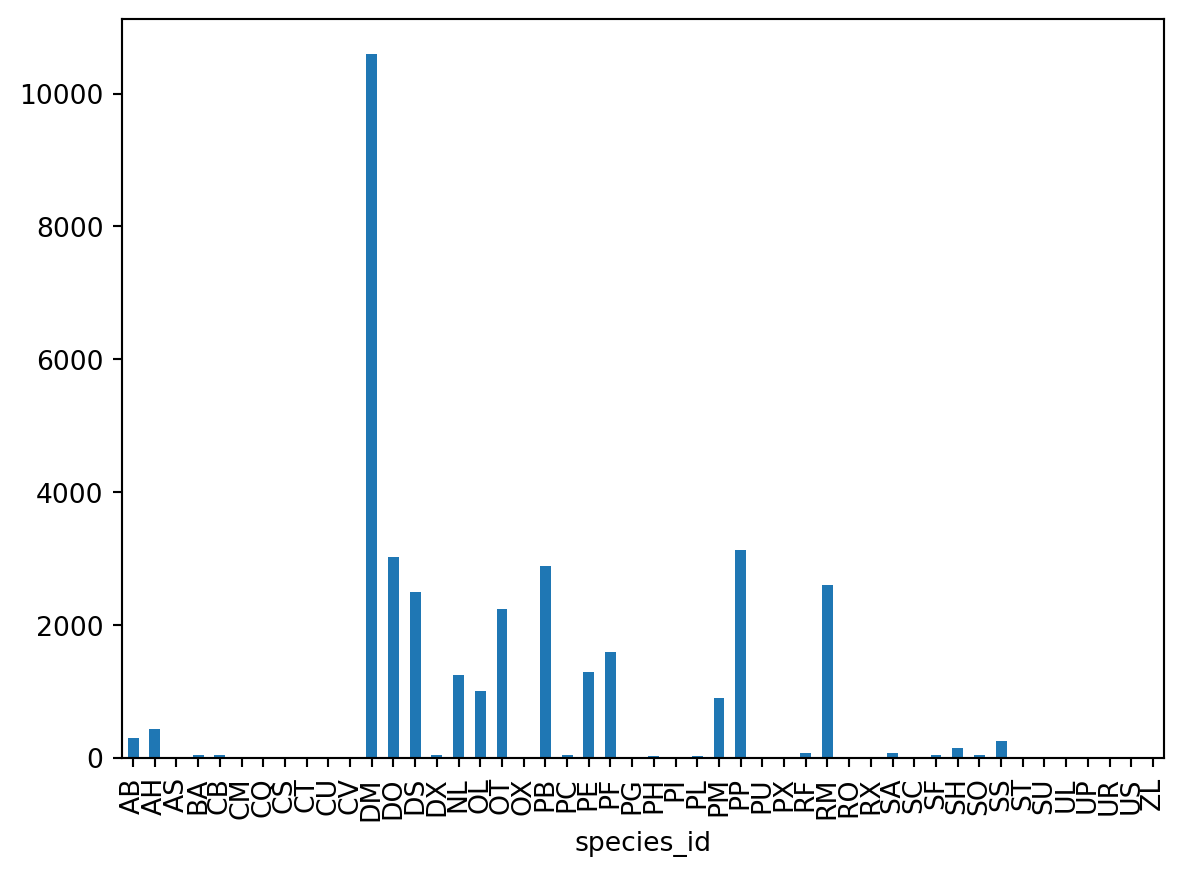

In [38]:
species_counts.plot(kind='bar')

## Summary grouping
Grouping is one of the most common operation in data analysis. Data often consists of different measurements on the same samples. In many cases we are not only interested in one particular measurement but in the cross product of measurements. In the picture below we labeled samples with green lines, blue dots and red lines. We are now interested how these three different groups relate to each other given the all other measurements in the dataframe. Pandas' groupby function gives us the means to compare these three groups with several built-in statistical methods.

![Grouping sketch](images/grouping.jpeg)

<div class="alert alert-block alert-success">
<b>Exercise 8 to 10</b>
    
Now go to the Jupyter Dashboard in your internet browser and continue with the afternoon exercises 8 to 10.

After you finished the exercises please come back to this document and continue with the [following chapter](data-science-with-pandas-3.ipynb).